In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = './data/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [3]:
train_df = df.copy()


In [5]:
df.shape, train_df.shape, test_df.shape


((450, 16), (450, 16), (90, 17))

In [6]:
train_df.head()


,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [7]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [8]:
train_df.head()


,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [9]:
train_df['Display Size'].isna().sum()


30

In [10]:
train_df['Display Size'].value_counts().count()


40

In [11]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)


In [16]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [18]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [20]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

In [22]:
train_df['Display Size'].isna().sum()

31

In [25]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [53]:
cal=sum([int(x) for x in re.findall('\d+', '20 - 35 g')])/2

train_df['Weight'].replace(r'20 - 35 g', cal, regex=True, inplace=True)




In [54]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [55]:
cal=sum([int(x) for x in re.findall('\d+', '35 - 50 g')])/2

train_df['Weight'].replace(r'35 - 50 g', cal, regex=True, inplace=True)


In [56]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [57]:
cal=sum([int(x) for x in re.findall('\d+', '50 - 75 g')])/2

train_df['Weight'].replace(r'50 - 75 g', cal, regex=True, inplace=True)


In [58]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [59]:
train_df['Weight'].replace(r'75g +', float(re.findall('\d+', '75g +')[0]), regex=True, inplace=True)


In [60]:
train_df['Weight'].replace(r'<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), regex=True, inplace=True)


In [61]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [63]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5


In [64]:
(train_df['Original Price']*(-train_df['Discount Percentage']))/ 100

0      -6910.000000
1     -13200.000001
2      -5991.000000
3     -18200.000000
4      -3400.000000
           ...     
445    -3000.000000
446    -6299.000000
447    -3000.000000
448    -4799.000000
449    -4999.000000
Length: 450, dtype: float64

In [65]:
train_df.drop(['Discount Percentage'], axis=1, inplace=True)

### Numerical Column

In [66]:
numerical_col= [feature for feature in train_df.columns if train_df[feature].dtype=='float64']

In [67]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight']

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

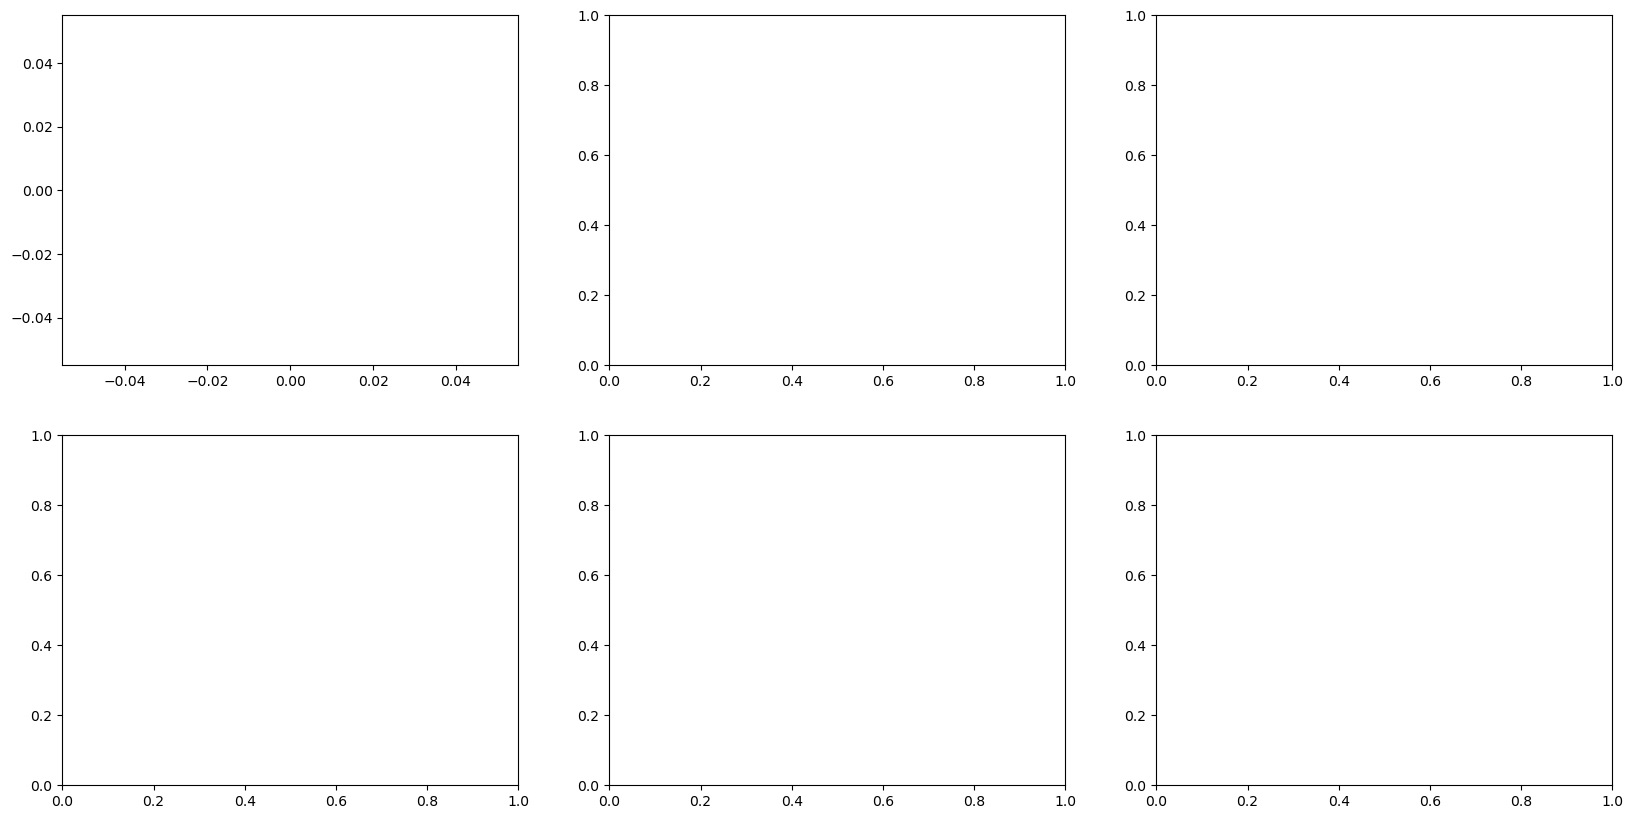

In [69]:
fig, axes= plt.subplots(2, 3, figsize=(20,10))

#plotiing a histogram
for i, column in enumerate(numerical_col):
    row=i//3
    col=i%3
    ax=axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)

plt.show()